## price-predictor

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## importing data

In [2]:
housing = pd.read_csv('data.csv')
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Describing and knowing more about the data

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       500 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [5]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,500.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.282030,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702174,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884750,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.205000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.620500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# for plotting histogram
# housing.hist(bins=50, figsize=(20,15))

## Train- test splitting

In [7]:
import numpy as np
#for learning purposes
# def train_test_split(data,ratio):
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data))
#     test_size = int(len(data)*ratio)
#     test_index = shuffled[:test_size]
#     train_index = shuffled[test_size:]
#     return data.iloc[test_index], data.iloc[train_index]

In [8]:
# test_set, train_set = train_test_split(housing,0.2)

In [9]:
# print(f"Number of rows in train set is: {len(train_set)}\nNumber of Rows in test set is: {len(test_set)}")

In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [11]:
print(f"Number of rows in train set is: {len(train_set)}\nNumber of Rows in test set is: {len(test_set)}")

Number of rows in train set is: 404
Number of Rows in test set is: 102


In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=2,test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing,housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [14]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [15]:
housing = strat_train_set.copy()

## Looking for correlations

In [16]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.686022
ZN         0.345162
B          0.335772
DIS        0.245794
CHAS       0.154175
AGE       -0.358729
RAD       -0.386831
CRIM      -0.393238
NOX       -0.418736
TAX       -0.481958
INDUS     -0.507258
PTRATIO   -0.517195
LSTAT     -0.740104
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

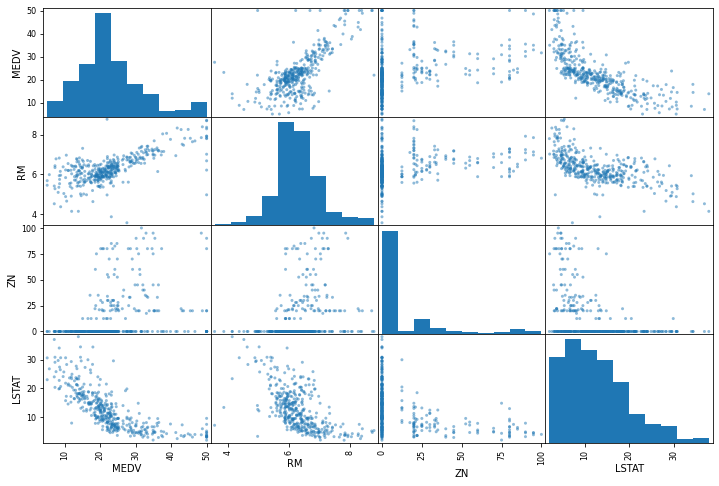

In [17]:
from pandas.plotting import scatter_matrix
attributes = ['MEDV','RM','ZN','LSTAT']
scatter_matrix(housing[attributes],figsize=(12,8))

<AxesSubplot:xlabel='average number of rooms per dwelling', ylabel="Median value of owner-occupied homes in $1000's">

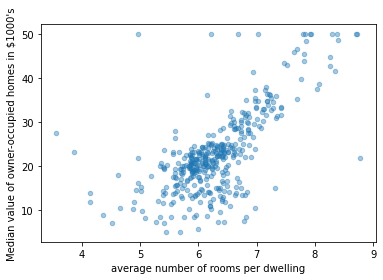

In [18]:
housing.plot(kind='scatter',x='RM',y='MEDV',xlabel="average number of rooms per dwelling",ylabel="Median value of owner-occupied homes in $1000's",alpha=0.4)

In [19]:
housing['TAXRM'] = housing['TAX']/housing['RM']

In [20]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
89,0.05302,0.0,3.41,0,0.489,7.079,63.1,3.4145,2,270,17.8,396.06,5.70,28.7,38.140980
183,0.10008,0.0,2.46,0,0.488,6.563,95.6,2.8470,3,193,17.8,396.90,5.68,32.5,29.407283
191,0.06911,45.0,3.44,0,0.437,6.739,30.8,6.4798,5,398,15.2,389.71,4.69,30.5,59.059208
443,9.96654,0.0,18.10,0,0.740,6.485,100.0,1.9784,24,666,20.2,386.73,18.85,15.4,102.698535
92,0.04203,28.0,15.04,0,0.464,6.442,53.6,3.6659,4,270,18.2,395.01,8.16,22.9,41.912450


In [21]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.686022
ZN         0.345162
B          0.335772
DIS        0.245794
CHAS       0.154175
AGE       -0.358729
RAD       -0.386831
CRIM      -0.393238
NOX       -0.418736
TAX       -0.481958
INDUS     -0.507258
PTRATIO   -0.517195
TAXRM     -0.545956
LSTAT     -0.740104
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='tax per room', ylabel="Median value of owner-occupied homes in $1000's">

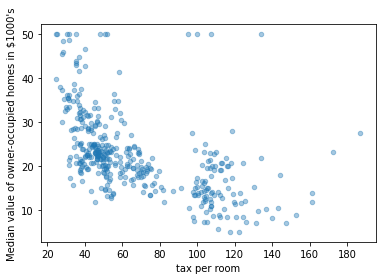

In [22]:
housing.plot(kind='scatter',x='TAXRM',y='MEDV',xlabel='tax per room',ylabel="Median value of owner-occupied homes in $1000's",alpha=0.4)

In [23]:
housing = strat_train_set.drop("MEDV",axis=1)
housing_labels = strat_train_set['MEDV'].copy()

## Handling missing attributes

In [24]:
# to handle the missing data attributes, we have three options:
#     1. get rid of the missing data points
#     2. get rid of the whole attribute
#     3. Set the value to some value( 0 mean, median )

In [25]:
housing.dropna(subset=['RM']).shape #option 1
# does not change the original data frame

(399, 13)

In [26]:
housing.drop('RM',axis=1).shape #option 2
#does not change the original data frame or the original data set

(404, 12)

In [27]:
median = housing['RM'].median()
median
housing['RM'].fillna(median)

89     7.079
183    6.563
191    6.739
443    6.485
92     6.442
       ...  
351    6.579
353    6.728
150    6.122
430    6.348
369    6.683
Name: RM, Length: 404, dtype: float64

In [28]:
housing.shape

(404, 13)

In [29]:
housing.describe() #before we started filling missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.616320,11.860149,10.963540,0.069307,0.552677,6.296995,68.077475,3.783533,9.418317,404.655941,18.375495,356.220495,12.567797
std,8.883261,23.607489,6.849207,0.254290,0.115315,0.730915,28.557010,2.112777,8.654422,168.516025,2.216321,91.989648,7.232315
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,6.000000,1.137000,1.000000,187.000000,12.600000,0.320000,1.920000
25%,0.078832,0.000000,4.950000,0.000000,0.448750,5.886000,42.275000,2.077100,4.000000,277.000000,16.900000,374.335000,6.710000
50%,0.261390,0.000000,8.560000,0.000000,0.535000,6.229000,76.800000,3.167500,5.000000,329.000000,18.700000,391.605000,11.170000
75%,3.359357,20.000000,18.100000,0.000000,0.624000,6.665500,94.325000,5.218725,24.000000,666.000000,20.200000,395.810000,16.977500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [30]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [31]:
imputer.statistics_

array([2.61390e-01, 0.00000e+00, 8.56000e+00, 0.00000e+00, 5.35000e-01,
       6.22900e+00, 7.68000e+01, 3.16750e+00, 5.00000e+00, 3.29000e+02,
       1.87000e+01, 3.91605e+02, 1.11700e+01])

In [32]:
X = imputer.transform(housing)

In [33]:
housing_tr = pd.DataFrame(X,columns=housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.616320,11.860149,10.963540,0.069307,0.552677,6.296153,68.077475,3.783533,9.418317,404.655941,18.375495,356.220495,12.567797
std,8.883261,23.607489,6.849207,0.254290,0.115315,0.726406,28.557010,2.112777,8.654422,168.516025,2.216321,91.989648,7.232315
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,6.000000,1.137000,1.000000,187.000000,12.600000,0.320000,1.920000
25%,0.078832,0.000000,4.950000,0.000000,0.448750,5.887750,42.275000,2.077100,4.000000,277.000000,16.900000,374.335000,6.710000
50%,0.261390,0.000000,8.560000,0.000000,0.535000,6.229000,76.800000,3.167500,5.000000,329.000000,18.700000,391.605000,11.170000
75%,3.359357,20.000000,18.100000,0.000000,0.624000,6.655500,94.325000,5.218725,24.000000,666.000000,20.200000,395.810000,16.977500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Scikit-learn Design

In scikit learn mainly we have three types of objects:

    1. Estimators - It estimates some given parameter based on a data set. Example - imputer
                    It has a fit method and a transform method
                    Fit method - Fits the dataset and calculates internal parameters
                    
    2. Transformers -transform method takes the input and returns the output based on the learnings from fit().It also has
                    a convinience function called the fit_transform() which first fits and then transforms
                    
    3. predictors - Linear Regression is an example of Predictors. fit() and predict() are two common functions(). It also 
                    gives a score function which will evaluate the predictions.

## Feature Scaling

There are primarily two types of scaling methods:

    1. Normalization = (value - min)/(max-min)
       sklearn provides a class called MinMaxScaler
       
    2. Standardization = (value-mean)/standard Deviation
       sklearn provides a class called StandardScaler for this purpose

## Creating a Pipeline

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
   ('imputer',SimpleImputer(strategy='median')),
#     ....we can add as many as we like in our pipeline
   ('std_scaler',StandardScaler()),
])

In [35]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [36]:
len(housing_num_tr)
housing_num_tr.shape

(404, 13)

## Selecting a desired Model for our data.

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
# model = LinearRegression()
# model = DecisionTreeRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [38]:
housing.shape

(404, 13)

In [39]:
housing_labels.shape

(404,)

In [40]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [41]:
transformed_data = my_pipeline.transform(some_data)

In [42]:
model.predict(transformed_data)

array([30.491, 31.825, 30.124, 15.227, 22.924])

In [43]:
list(some_labels)

[28.7, 32.5, 30.5, 15.4, 22.9]

## Evaluating the model

In [44]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels,housing_predictions)

In [45]:
rmse = np.sqrt(mse)
mse

1.7418539653465335

## Using better evaluation technique - Cross validation

In [46]:
# break it into 10 batches and calculate the error by eliminating each batch once.
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_labels, scoring = "neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)

In [47]:
rmse_scores

array([2.88497028, 4.93967217, 4.20085986, 2.76508209, 2.71948232,
       4.7921028 , 3.09222161, 5.16978374, 2.5981031 , 3.45627679])

In [48]:
avg = rmse_scores.mean()
stdev = rmse_scores.std()

In [49]:
print(avg,stdev)

3.6618554750883696 0.9627451709245249


## Saving the model

In [50]:
from joblib import dump, load
dump(model, 'Real_Estate_Price_prediction.joblib') 

['Real_Estate_Price_prediction.joblib']

## Testing the Model on test Data

In [52]:
X_test = strat_test_set.drop('MEDV',axis=1)
Y_test = strat_test_set['MEDV'].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_pred = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_pred)
final_rmse = np.sqrt(final_mse)
print(Y_test, final_pred)

202    42.3
61     16.0
278    29.1
171    19.1
357    21.7
       ... 
219    23.0
320    23.8
9      18.9
204    50.0
359    22.6
Name: MEDV, Length: 102, dtype: float64 [44.318 18.793 24.86  21.64  20.324 21.765  8.113 26.914 23.758  8.696
 11.375 12.252 17.178 19.444 20.478 20.486 23.374 24.367 16.01  12.402
 18.607 24.456 34.26  44.32  28.073 18.089  9.698 40.613 22.185 14.072
 20.337 21.048 24.117 30.94  21.911 20.331  9.915 16.412 35.285 15.041
 14.157 24.12  15.718 21.998 16.477 14.101 16.201 30.316 19.989 15.304
 31.23  33.167 19.513 20.35  21.135 24.107 20.41  10.803 15.167 22.004
 20.037 19.775 24.412 20.204 44.036 10.171 20.068 16.13  26.5   18.483
 20.969 20.545 41.124 31.136 23.196 25.549 19.65  20.767 18.828 15.909
 28.304 23.474 21.002 15.229 20.816 20.243 21.453  9.357 23.994 25.03
 21.889 20.1   17.592 18.908 20.812 14.488 13.15  22.553 24.444 19.743
 46.525 20.411]
